## Лабораторная 4: восстановление плотности распределения

Данными в этом задании являются измерения некоторых проверочных параметров на конвейерах  сборки оборудования Bosh (см. [конкурс](https://www.kaggle.com/c/bosch-production-line-performance) «Bosch Production Line Performance» на Kaggle). 

Все исходные данные Bosh не помещаются в оперативную память компьютера, поэтому в файле `data.csv` — лишь некоторые признаки. Прочтите данные из файла `data.csv`. Целевым признаком здесь является `Response` — наличие брака в оборудовании. 

In [1]:
import pandas as pd

In [2]:
# место для кода n=19
df = pd.read_csv('data.csv', delimiter=',')
df.describe()

,L1_S24_F1844,L1_S24_F1846,Response
count,61949.000000,61949.000000,61949.000000
mean,0.000329,-0.000791,0.009847
std,0.191397,0.134613,0.098742
min,-0.406000,-0.622000,0.000000
25%,-0.146000,-0.120000,0.000000
50%,-0.001000,-0.001000,0.000000
75%,0.143000,0.125000,0.000000
max,3.000000,0.355000,1.000000


In [3]:
df.tail()

,L1_S24_F1844,L1_S24_F1846,Response
61944,0.145,-0.159,0
61945,-0.233,0.189,0
61946,0.013,0.134,0
61947,0.097,-0.155,0
61948,0.020,-0.116,0


## 1 
Постройте на одном графике два приближения к плотности распределения признака `L1_S24_F1846` для `Response = 0` и для `Response = 1`, используя одно из следующих ядер (номер ядра выберите по формуле: `(n mod 6) + 1`, где `n` — ваш номер в списке группы):

    1.	кусочно-постоянное (прямоугольное) -  tophat
    2.	гауссовское -  gaussian
    3.	линейное (треугольник) -  linear
    4.	косинусоидальное -  cosine
    5.	квадратичное (Епанечникова) -  epanechnikov
    6.	экспоненциальное -  exponential


In [4]:
from sklearn.neighbors.kde import KernelDensity
import numpy as np

import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.kde module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


*Help:*

    i0 = data['Response'] == 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(data.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
    X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
    Dens0 = np.exp(kde0.score_samples(X_plot))  # score_samples возвращает логарифм плотности

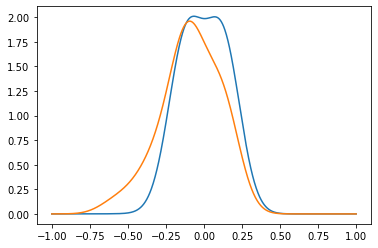

In [63]:
# место для кода
i0 = df['Response'] == 0
kde0 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(df.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))
X_plot = np.linspace(-1, 1, 1000).reshape(-1, 1)
Dens0 = np.exp(kde0.score_samples(X_plot))
i0 = df['Response'] == 1
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(df.loc[i0, 'L1_S24_F1846'].values.reshape(-1, 1))

Dens1 = np.exp(kde1.score_samples(X_plot))
plt.plot(X_plot, Dens0)
plt.plot(X_plot, Dens1)
plt.show()

Ответьте в комментариях на вопрос: является ли выборка хорошо разделимой по признаку  `L1_S24_F1846`?

In [6]:
# место для комментария
# Нет не явдяется поскольку множества сильно пересекаются 

## 2

Разбейте выборку `data` на две равные части: тренировочную `dataTrain` и проверочную `dataTest`. 

In [7]:
dataTrain = df.loc[0:df.shape[0] / 2, ].reset_index(drop=True)
dataTest = df.loc[df.shape[0] / 2:df.shape[0], ].reset_index(drop=True)

Пользуясь кросс-валидацией, подберите **для каждого класса `Response` (`r=0` и `r=1`)** значение ширины ядра `bandwidth`, при котором логарифм правдоподобия максимален на проверочной выборке.

*Help:*

    r = 0
    kde0 = KernelDensity(kernel='gaussian', bandwidth=0.05)
    kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
    logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
    logLikehood0 = logProbability0.sum()
    print(logLikehood0)

In [8]:
# место для кода
r = 0
kde0 = KernelDensity(kernel='gaussian', bandwidth=0.015)
kde0.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0 = kde0.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability0[np.isinf(logProbability0)] = -100 # заменяем -бесконечность
logLikehood0 = logProbability0.sum()
print(logLikehood0)

25265.343584317856


In [9]:
r = 1
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.02)
kde1.fit(dataTrain.loc[dataTrain['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1 = kde1.score_samples(dataTest.loc[dataTest['Response']==r, 'L1_S24_F1846'].values.reshape(-1, 1))
logProbability1[np.isinf(logProbability1)] = -100 # заменяем -бесконечность
logLikehood1 = logProbability1.sum()
print(logLikehood1)

132.84633115560692


### 3

Для найденных наилучших `bandwidth` вычислите `p(x|0)` и `p(x|1)` для тестовой выборки. 

In [10]:
predictionProbXafter0 = np.exp(kde0.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))
predictionProbXafter1 = np.exp(kde1.score_samples(dataTest['L1_S24_F1846'].values.reshape(-1, 1)))

In [64]:
def bayes_proba(x):
    prob_ = df['Response'].value_counts()[x]/ len(df['Response'])
    if x == 0:     
        return predictionProbXafter0*prob_/ ((1 - prob_)*predictionProbXafter1 + prob_*predictionProbXafter0) 
    return predictionProbXafter1*prob_ / ((1 - prob_)*predictionProbXafter0 + prob_*predictionProbXafter1)

In [65]:
df.shape

(61949, 3)

По формуле Байеса найдите затем `p(0|x)` и `p(1|x)`. Отсортируйте все объекты тестовой выборки по возрастанию предсказанной вероятности `p(1|x)`, выведите на экран вероятности для последних 10 объектов и рассчитайте количество бракованных деталей среди последних 100 объектов в отсортированном ряду.

*Help:*
    
    ind = np.argsort(predictionProb1afterX) - сортировка, возвращающая индексы элементов
    print(predictionProb1afterX[ind[-10:]]) - вывод последних 10 элементов
    print(sum(dataTest.loc[ind[-100:],'Response'])) - количество бракованных среди 100 с максимальной вероятностью брака

In [66]:
logProbability1 = bayes_proba(1)

In [67]:
# место для кода
ind = np.argsort(logProbability1)# - сортировка, возвращающая индексы элементов
print(logProbability1[ind[-10:]])# - вывод последних 10 элементов
print(sum(dataTest.loc[ind[-100:],'Response']))# - количество бракованных среди 100 с максимальной вероятностью брака

[0.60451118 0.6156455  0.6156455  0.62867901 0.63937015 0.63937015
 0.64217671 0.64217671 0.658035   0.658035  ]
30
